In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
'''         Looking and visualizing the data :-          '''

data = pd.read_excel("D:\Internship\Week 6\covid report.xlsx")

pd.set_option("display.max_columns",None)
data.head(30)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [3]:
data.shape

(5644, 111)

In [4]:
#Positive and Negative Cases :-
data['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

<AxesSubplot:xlabel='SARS-Cov-2 exam result', ylabel='count'>

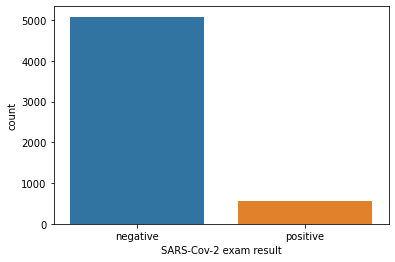

In [5]:
sns.countplot(x='SARS-Cov-2 exam result',data=data)

In [6]:
'''         MAKING THE DATA ACCURATE TO WORK ON :-         '''

#Dropping unnecessary columns :-
data.drop(['Patient ID'], axis=1, inplace=True)

In [7]:
#Checking for missing data column wise:-
def get_missing_data():
    Missing_Data = data.isnull().sum().sort_values()
    Missing_Data_precentage = ((data.isnull().sum()/data.isnull().count())*100).sort_values()
    return pd.concat([Missing_Data, Missing_Data_precentage], axis=1, keys=['Missing_Data', 'Percentage'])

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(get_missing_data())

                                                    Missing_Data  Percentage
Patient age quantile                                           0    0.000000
SARS-Cov-2 exam result                                         0    0.000000
Patient addmited to regular ward (1=yes, 0=no)                 0    0.000000
Patient addmited to semi-intensive unit (1=yes,...             0    0.000000
Patient addmited to intensive care unit (1=yes,...             0    0.000000
Influenza B                                                 4290   76.009922
Respiratory Syncytial Virus                                 4290   76.009922
Influenza A                                                 4290   76.009922
Rhinovirus/Enterovirus                                      4292   76.045358
Inf A H1N1 2009                                             4292   76.045358
CoronavirusOC43                                             4292   76.045358
Coronavirus229E                                             4292   76.045358

In [8]:
#Dropping the columns with more than 90% missing data :-
data = data.dropna( axis=1, thresh = (0.1*data.shape[0]))
data.shape

(5644, 38)

In [9]:
data.replace('not_detected', 0, inplace=True)
data.replace('detected', 1, inplace=True)
data.replace('absent', 0, inplace=True)
data.replace('present', 1, inplace=True)
data.replace('negative', 0, inplace=True)
data.replace('positive', 1, inplace=True)

In [10]:
pd.set_option("display.max_rows",None)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient age quantile,5644.0,9.318391e+00,5.777903,0.000000,4.000000,9.000000,14.000000,19.000000
SARS-Cov-2 exam result,5644.0,9.886605e-02,0.298509,0.000000,0.000000,0.000000,0.000000,1.000000
"Patient addmited to regular ward (1=yes, 0=no)",5644.0,1.399717e-02,0.117489,0.000000,0.000000,0.000000,0.000000,1.000000
"Patient addmited to semi-intensive unit (1=yes, 0=no)",5644.0,8.858965e-03,0.093713,0.000000,0.000000,0.000000,0.000000,1.000000
"Patient addmited to intensive care unit (1=yes, 0=no)",5644.0,7.264352e-03,0.084929,0.000000,0.000000,0.000000,0.000000,1.000000
Hematocrit,603.0,-2.186214e-09,1.000830,-4.501420,-0.518807,0.053407,0.717175,2.662704
Hemoglobin,603.0,-1.601319e-08,1.000830,-4.345603,-0.586244,0.040316,0.729532,2.671868
Platelets,602.0,-3.535004e-10,1.000832,-2.552426,-0.605346,-0.121716,0.531498,9.532034
Mean platelet volume,599.0,7.438142e-09,1.000836,-2.457575,-0.662483,-0.101517,0.683835,3.713052
Red blood Cells,602.0,8.424447e-09,1.000832,-3.970608,-0.567950,0.013852,0.666176,3.645706


In [11]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
data.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [12]:
#Checking for missing data row wise:-
print('Total Columns: ', data.shape[1])
data.isna().sum(axis=1).value_counts()

Total Columns:  38


33    3596
16     820
31     458
2      263
14     166
19     139
0       99
17      97
3        4
28       1
30       1
dtype: int64

In [13]:
#Above data tells that out of 5644 rows, 3596 rows have 33 NaN column values.
#Now dropping rows with more than 31 NaN column values :-
data = data[data.isna().sum(axis=1) < 31]
data.shape

(1590, 38)

In [14]:
data.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
1,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
8,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.36455,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
9,17,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
13,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [15]:
#Checking for missing data column wise again:-
def get_missing_data():
    Missing_Data = data.isnull().sum().sort_values()
    Missing_Data_precentage = ((data.isnull().sum()/data.isnull().count())*100).sort_values()
    return pd.concat([Missing_Data, Missing_Data_precentage], axis=1, keys=['Missing_Data', 'Percentage'])

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(get_missing_data())

                                                    Missing_Data  Percentage
Patient age quantile                                           0    0.000000
SARS-Cov-2 exam result                                         0    0.000000
Patient addmited to regular ward (1=yes, 0=no)                 0    0.000000
Patient addmited to semi-intensive unit (1=yes,...             0    0.000000
Patient addmited to intensive care unit (1=yes,...             0    0.000000
Respiratory Syncytial Virus                                  236   14.842767
Influenza A                                                  236   14.842767
Influenza B                                                  236   14.842767
Inf A H1N1 2009                                              238   14.968553
CoronavirusOC43                                              238   14.968553
Metapneumovirus                                              238   14.968553
Parainfluenza 4                                              238   14.968553

In [16]:
data.shape

(1590, 38)

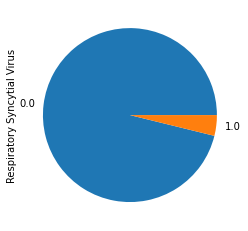

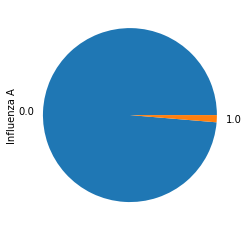

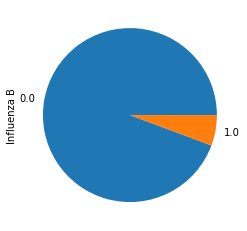

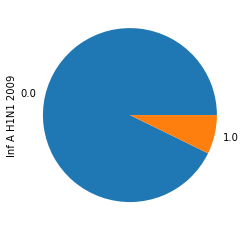

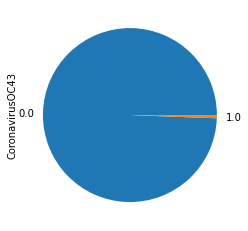

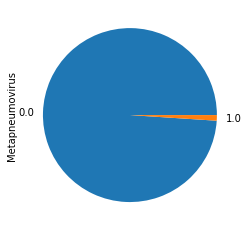

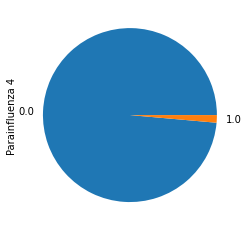

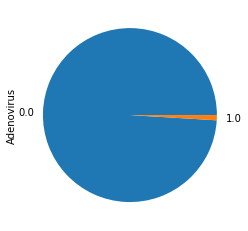

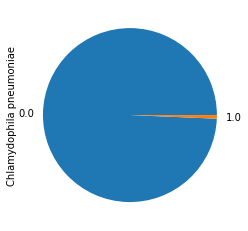

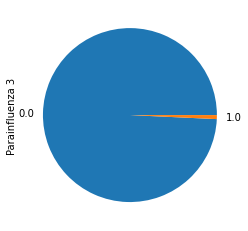

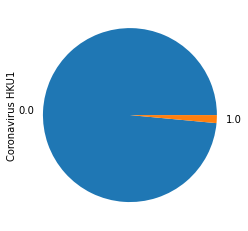

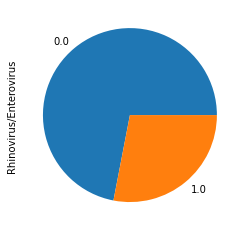

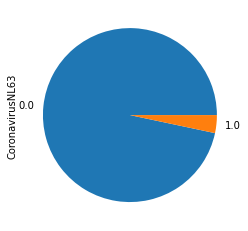

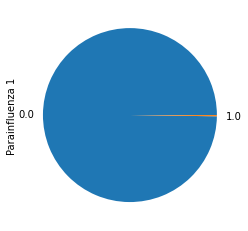

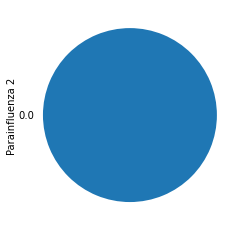

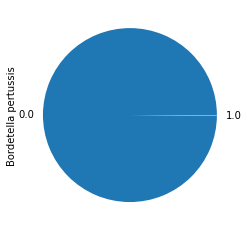

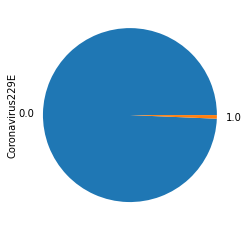

In [17]:
categorical_columns_with_less_missing_data = ['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Inf A H1N1 2009', 'CoronavirusOC43', 
           'Metapneumovirus', 'Parainfluenza 4', 'Adenovirus', 'Chlamydophila pneumoniae', 'Parainfluenza 3', 
           'Coronavirus HKU1', 'Rhinovirus/Enterovirus', 'CoronavirusNL63', 'Parainfluenza 1', 'Parainfluenza 2', 
           'Bordetella pertussis', 'Coronavirus229E']

for col in categorical_columns_with_less_missing_data:
    plt.figure()
    data[col].value_counts().plot.pie()

In [18]:
#Here, "Parainfluenza 2" has only 1 type of data so we will drop this column :-
data.drop('Parainfluenza 2', axis=1, inplace=True)
categorical_columns_with_less_missing_data.remove('Parainfluenza 2')
data.shape

(1590, 37)

In [19]:
#Now filling "categorical_columns_with_less_missing_data" with mode values :-
#All these columns have mode = 0
for col in categorical_columns_with_less_missing_data:
    data[col] = data[col].fillna(0)
data.head(30)

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test"
1,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
8,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
9,17,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
13,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
14,14,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
15,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
18,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
20,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Influenza B, rapid test', ylabel='count'>

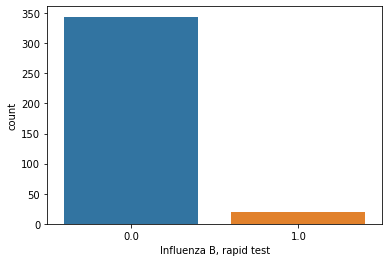

In [20]:
categorical_columns_with_high_missing_data = ['Influenza B, rapid test', 'Influenza A, rapid test']
sns.countplot(x='Influenza B, rapid test',data=data)

<AxesSubplot:xlabel='Influenza A, rapid test', ylabel='count'>

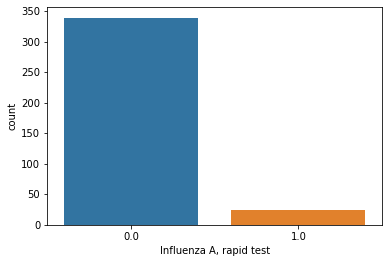

In [21]:
sns.countplot(x='Influenza A, rapid test',data=data)

In [22]:
#After observing "categorical_columns_with_high_missing_data", there is large amount of '0' values than '1',
#so replacing NaN values with '0' :-
for col in categorical_columns_with_high_missing_data:
    data[col] = data[col].fillna(0)
data.head(30)

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test"
1,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,17,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,14,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
18,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Checking for missing data column wise again:-
def get_missing_data():
    Missing_Data = data.isnull().sum().sort_values()
    Missing_Data_precentage = ((data.isnull().sum()/data.isnull().count())*100).sort_values()
    return pd.concat([Missing_Data, Missing_Data_precentage], axis=1, keys=['Missing_Data', 'Percentage'])

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(get_missing_data())

                                                    Missing_Data  Percentage
Patient age quantile                                           0    0.000000
Influenza A                                                    0    0.000000
Influenza B                                                    0    0.000000
Parainfluenza 1                                                0    0.000000
CoronavirusNL63                                                0    0.000000
Rhinovirus/Enterovirus                                         0    0.000000
Coronavirus HKU1                                               0    0.000000
Parainfluenza 3                                                0    0.000000
Chlamydophila pneumoniae                                       0    0.000000
Adenovirus                                                     0    0.000000
Parainfluenza 4                                                0    0.000000
Coronavirus229E                                                0    0.000000

In [24]:
#Using linear regression for data imputation
for feature in data[data.columns[5:19]]:
    data_split = data.dropna(axis=0, subset=['Patient age quantile', feature]).loc[:, ['Patient age quantile', feature]]
    missing = data[feature].isnull()
    missing_value = pd.DataFrame(data['Patient age quantile'][missing])

    X = data_split[['Patient age quantile']]
    y = data_split[feature]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    regressor = LinearRegression().fit(X_train, y_train)

    data.loc[data[feature].isna(), feature] = regressor.predict(missing_value)

data.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test"
1,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,0,0,0,0,0.057713,0.029415,-0.119284,0.101643,-0.033681,-0.025230,-0.097831,-0.131793,0.092213,0.132576,-0.000157,0.198510,0.044049,0.119872,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,17,0,0,0,0,0.091784,0.049390,-0.168430,0.142256,-0.048645,-0.058088,-0.145768,-0.187129,0.131912,0.203336,0.008688,0.301447,0.069049,0.180521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,13,0,0,0,0,0.023641,0.009439,-0.070137,0.061030,-0.018718,0.007628,-0.049894,-0.076458,0.052515,0.061816,-0.009002,0.095573,0.019050,0.059223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
data.shape

(1590, 37)

In [26]:
#Checking for missing data column wise again:-
def get_missing_data():
    Missing_Data = data.isnull().sum().sort_values()
    Missing_Data_precentage = ((data.isnull().sum()/data.isnull().count())*100).sort_values()
    return pd.concat([Missing_Data, Missing_Data_precentage], axis=1, keys=['Missing_Data', 'Percentage'])

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(get_missing_data())

                                                    Missing_Data  Percentage
Patient age quantile                                           0         0.0
Influenza A                                                    0         0.0
Influenza B                                                    0         0.0
Parainfluenza 1                                                0         0.0
CoronavirusNL63                                                0         0.0
Rhinovirus/Enterovirus                                         0         0.0
Coronavirus HKU1                                               0         0.0
Parainfluenza 3                                                0         0.0
Chlamydophila pneumoniae                                       0         0.0
Adenovirus                                                     0         0.0
Parainfluenza 4                                                0         0.0
Coronavirus229E                                                0         0.0

In [27]:
#As we can see now, there is no missing data.

In [28]:
#Positive and Negative Cases :-
data['SARS-Cov-2 exam result'].value_counts()

0    1447
1     143
Name: SARS-Cov-2 exam result, dtype: int64

In [29]:
'''       Now the data is ready for modelling :-      '''

#Correlation :-
correlation_matrix = abs(data.corr())
correlation_target = correlation_matrix["SARS-Cov-2 exam result"]
correlation_target

Patient age quantile                                     0.143419
SARS-Cov-2 exam result                                   1.000000
Patient addmited to regular ward (1=yes, 0=no)           0.275443
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.045705
Patient addmited to intensive care unit (1=yes, 0=no)    0.061802
Hematocrit                                               0.086764
Hemoglobin                                               0.086147
Platelets                                                0.221472
Mean platelet volume                                     0.092647
Red blood Cells                                          0.084617
Lymphocytes                                              0.027462
Mean corpuscular hemoglobin concentration (MCHC)         0.015999
Leukocytes                                               0.227184
Basophils                                                0.032822
Mean corpuscular hemoglobin (MCH)                        0.005981
Eosinophil

In [30]:
#Choosing columns :-
columns = ['Patient age quantile', 'SARS-Cov-2 exam result', 'Patient addmited to regular ward (1=yes, 0=no)', 'Hematocrit', 
               'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Leukocytes', 'Eosinophils', 
                   'Monocytes', 'Rhinovirus/Enterovirus', 'Inf A H1N1 2009']

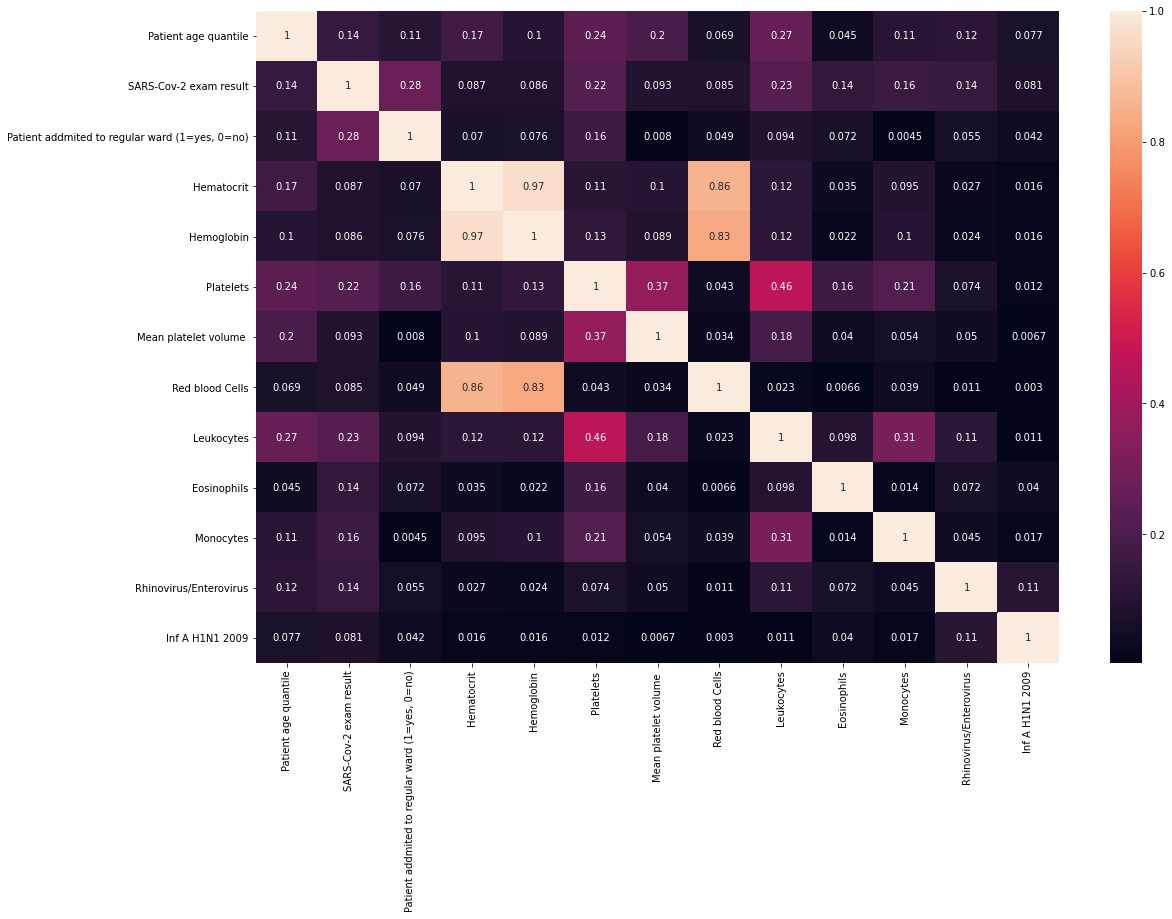

In [31]:
# Making Correlation Matrix Heat Map :-
plt.figure(figsize=(18,12))
plt.title = "Correlation Matrix"
sns.heatmap(abs(data[columns].corr()), annot=True)
plt.show()

In [32]:
'''
Correlation Analysis :-
"Inf A H1N1 2009" (Very low correlation = 0.081) (drop it)
"Hematocrit" and "Hemoglobin" are highly correlated to each other with 0.97. It means they are basically the same.
So dropping one of them. They also have high corelation with "Red blood Cells" (0.86 and 0.83). 
These 3 have almost same correlation with target variable so just keeping 1 of them.
So dropping "Inf A H1N1 2009", "Hematocrit" and "Hemoglobin".
'''

unwanted_columns = ['Inf A H1N1 2009', 'Hematocrit', 'Hemoglobin']
columns = [x for x in columns if x not in unwanted_columns]
columns

['Patient age quantile',
 'SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Leukocytes',
 'Eosinophils',
 'Monocytes',
 'Rhinovirus/Enterovirus']

In [33]:
columns.remove('SARS-Cov-2 exam result')

In [34]:
#Splitting the data :-
from sklearn.model_selection import train_test_split

X = data[columns]
y = data['SARS-Cov-2 exam result']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
from sklearn import preprocessing
scaler_ss = preprocessing.StandardScaler()
X_train_scaled = scaler_ss.fit_transform(X_train)
X_test_scaled = scaler_ss.fit_transform(X_test)

In [36]:
#Now proceeding with different models :-
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Accuracy_list = []
Algorithm = []

In [37]:
#KNN CLASSIFIER :-

knn = KNeighborsClassifier()

param_grid = {'n_neighbors' : np.arange(1,50), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]}
knn_cv = GridSearchCV(knn, param_grid, cv=None)
knn_cv.fit(X_train,y_train)

print("Best Paramters : {}".format(knn_cv.best_params_))
accuracy_knn = knn_cv.best_score_
Accuracy_list.append(accuracy_knn)
Algorithm.append('KNN')
print("Accuracy : {0:.4f}".format(accuracy_knn))

y_pred = knn_cv.predict(X_test)

Best Paramters : {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Accuracy : 0.9137


In [38]:
#Confusion Matrix :-
print(confusion_matrix(y_test, y_pred))

[[434   4]
 [ 28  11]]


In [44]:
print("% of wrongly classified data : ",(28+4)*100/477)

% of wrongly classified data :  6.7085953878406706


In [39]:
#SVM CLASSIFIER :-

SVC_param = {'kernel' : ['sigmoid','rbf','poly','linear'], 'C' : [1], 'decision_function_shape' : ['ovr'], 
                 'random_state' : np.arange(0,100)}
SVC_optimal_param = GridSearchCV(SVC(), SVC_param, cv=None)
SVC_optimal_param.fit(X_train_scaled, y_train)

y_pred = SVC_optimal_param.predict(X_test_scaled)

print("The best parameters are :- ",SVC_optimal_param.best_params_)

accuracy_svm = metrics.accuracy_score(y_test, y_pred)
print("Accuracy :-  {0:.4f}".format(accuracy_svm))

Accuracy_list.append(accuracy_svm)
Algorithm.append('SVM')

The best parameters are :-  {'C': 1, 'decision_function_shape': 'ovr', 'kernel': 'rbf', 'random_state': 0}
Accuracy :-  0.9350


In [40]:
#Confusion Matrix :-
print(confusion_matrix(y_test, y_pred))

[[437   1]
 [ 30   9]]


In [45]:
print("% of wrongly classified data : ",(1+30)*100/477)

% of wrongly classified data :  6.49895178197065


In [41]:
#DECISION TREE CLASSIFIER :-

dt_classifier = DecisionTreeClassifier()

dt_param = {'criterion' : ['gini', 'entropy'], 'random_state' : np.arange(0,100), 'max_depth' : np.arange(2,10), 
                'min_samples_leaf' : [5]}
dt_optimal_param = GridSearchCV(dt_classifier, dt_param, cv=None)

dt_optimal_param.fit(X_train, y_train)

y_pred = dt_optimal_param.predict(X_test)

print("The best parameters are :- ",dt_optimal_param.best_params_)

accuracy_dt = metrics.accuracy_score(y_test, y_pred)
print("Accuracy :-  {0:.4f}".format(accuracy_dt))

Accuracy_list.append(accuracy_dt)
Algorithm.append('DT')

The best parameters are :-  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'random_state': 0}
Accuracy :-  0.9224


In [42]:
#Confusion Matrix :-
print(confusion_matrix(y_test, y_pred))

[[428  10]
 [ 27  12]]


In [46]:
print("% of wrongly classified data : ",(10+27)*100/477)

% of wrongly classified data :  7.756813417190775


Accuracy :-
KNN  : 0.9137
SVM  : 0.9350
DT  : 0.9224


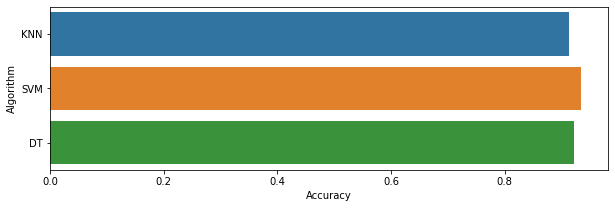

Therefore, SVM Classifier is the Best Model.


In [43]:
#Plotting accuracy :-

print("Accuracy :-")
for i in range(0, len(Accuracy_list)) :
    print(Algorithm[i], " : {0:.4f}".format(Accuracy_list[i]))

f,ax = plt.subplots(figsize = (10,3))
sns.barplot(x = Accuracy_list, y = Algorithm)
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.show()

print("Therefore, SVM Classifier is the Best Model.")